In [1]:
import cv2
import pandas as pd
import numpy as np
from tensorflow import keras
import glob
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---
# 장르 데이터 읽기

In [2]:
port_path = '../Data/Artist/genre/resized/portrait/*.jpg'
port_file = [file for file in glob.glob(port_path)]
portCount = len(port_file)
portCount

496

In [3]:
port_file_slt = [port_file[id] for id in np.random.randint(0, portCount, size=400)]
portCount = len(port_file_slt)
portCount

400

In [4]:
still_path = '../Data/Artist/genre/resized/still life/*.jpg'
still_file = [file for file in glob.glob(still_path)]
stillCount = len(still_file)
stillCount

372

In [5]:
height = 400
width = 600
colors = 3
numberOfimage = portCount + stillCount

In [6]:
trainData = np.zeros(numberOfimage * height * width * colors).reshape(-1, height, width, colors)

In [7]:
targetData = np.concatenate([np.zeros(portCount), np.ones(stillCount)]) # 0 : portrait, 1 : still Count
targetData

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
i = 0
for id in range(portCount):
    img = np.array(Image.open(port_file_slt[id]), np.int32)
    trainData[i] = img
    i += 1


In [9]:
for id in range(stillCount):
    img = np.array(Image.open(still_file[id]), np.int32)
    trainData[i] = img
    i += 1


---
# 학습, 검증, 테스트 데이터 분리

In [10]:
train = trainData / 255.0

In [11]:
trainData, testData, trainTarget, testTarget = train_test_split(
    train, targetData, test_size=0.2, random_state=42
)

trainData, valData, trainTarget, valTarget = train_test_split(
    trainData, trainTarget, test_size=0.2, random_state=42
)

In [12]:
print(trainData.shape)
print(trainTarget.shape)
print(valData.shape)
print(valTarget.shape)
print(testData.shape)
print(testTarget.shape)

(493, 400, 600, 3)
(493,)
(124, 400, 600, 3)
(124,)
(155, 400, 600, 3)
(155,)


---
# 딥러닝 모델 생성

In [13]:
model = keras.Sequential()

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-08-04 15:17:47.736586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-04 15:17:47.736735: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.add(
    keras.layers.Conv2D(
        64, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
        input_shape = (height, width, colors) 
    )
)

In [15]:
model.add(keras.layers.MaxPooling2D(2))

In [16]:
model.add(
    keras.layers.Conv2D(
        64, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
    )
)

In [17]:
model.add(keras.layers.MaxPooling2D(2))

In [18]:
model.add(
    keras.layers.Conv2D(
        128, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
    )
)

In [19]:
model.add(keras.layers.MaxPooling2D(2))

In [20]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))  # 50% Drop Out
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.7))  # 50% Drop Out
model.add(keras.layers.Dense(2, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 600, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 300, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 300, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 150, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 150, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 75, 128)      0

In [22]:
# 모델 학습하기
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics ='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/Artist/model/port_still_v3.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    trainData, 
    trainTarget, 
    epochs=50, 
    validation_data=[valData, valTarget],
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50


2022-08-04 15:17:48.821121: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-04 15:17:49.075309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 0.9874 - accuracy: 0.6268

2022-08-04 15:18:09.041983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 23s 1s/step - loss: 0.9874 - accuracy: 0.6268 - val_loss: 0.4287 - val_accuracy: 0.8710
Epoch 2/50
16/16 [==============================] - 22s 1s/step - loss: 0.4987 - accuracy: 0.8114 - val_loss: 0.3769 - val_accuracy: 0.8629
Epoch 3/50
16/16 [==============================] - 22s 1s/step - loss: 0.4336 - accuracy: 0.8215 - val_loss: 0.3786 - val_accuracy: 0.8629
Epoch 4/50
16/16 [==============================] - 22s 1s/step - loss: 0.3875 - accuracy: 0.8357 - val_loss: 0.3605 - val_accuracy: 0.8871
Epoch 5/50
16/16 [==============================] - 21s 1s/step - loss: 0.3850 - accuracy: 0.8418 - val_loss: 0.3438 - val_accuracy: 0.8952
Epoch 6/50
16/16 [==============================] - 22s 1s/step - loss: 0.3241 - accuracy: 0.8519 - val_loss: 0.3126 - val_accuracy: 0.8790
Epoch 7/50
16/16 [==============================] - 22s 1s/step - loss: 0.3743 - accuracy: 0.8519 - val_loss: 0.3167 - val_accuracy: 0.8871
Epoch 8/50
16/16 [=============

In [23]:
model.evaluate(testData, testTarget)

5/5 [==============================] - 2s 395ms/step - loss: 0.2045 - accuracy: 0.9226


[0.20449817180633545, 0.9225806593894958]

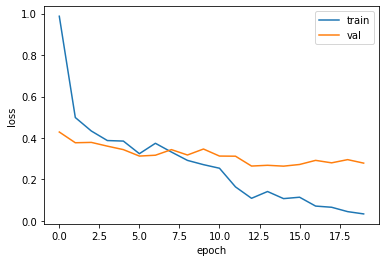

In [24]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()